In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../data/processed/traindata_nn_rf.csv")
df_test = pd.read_csv("../data/processed/testdata_nn_rf.csv")

In [3]:
df_test

,DATE,LOG_WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,...,annual_cos,half_annual_sin,half_annual_cos,quarter_annual_sin,quarter_annual_cos,month_sin,month_cos,weekly_sin,weekly_cos,time_index
0,2018-01-01,5.826000,-0.983710,0.083787,-0.251703,-0.493378,-0.214928,0.529667,2.772335,-0.753147,...,0.999852,0.034899,0.999391,0.069756,0.997564,5.000000e-01,0.866025,7.818315e-01,0.623490,1.732156
1,2018-01-02,5.826000,-0.574024,-0.419449,0.178371,-0.850710,-0.214928,0.099218,2.861490,-0.722150,...,0.999407,0.069756,0.997564,0.139173,0.990268,5.000000e-01,0.866025,9.749279e-01,-0.222521,1.732367
2,2018-01-03,5.826000,-0.492087,-0.657825,-0.382595,-0.111403,-0.214928,0.189839,2.861490,-0.722150,...,0.998667,0.104528,0.994522,0.207912,0.978148,5.000000e-01,0.866025,4.338837e-01,-0.900969,1.732578
3,2018-01-04,5.837730,-0.000464,-0.459179,0.832831,-1.269651,-0.214928,-0.852299,3.753032,-1.156109,...,0.997630,0.139173,0.990268,0.275637,0.961262,5.000000e-01,0.866025,-4.338837e-01,-0.900969,1.732788
4,2018-01-05,5.874931,0.655034,-0.287019,2.459633,-1.540730,-0.214928,-1.056195,3.753032,-1.156109,...,0.996298,0.173648,0.984808,0.342020,0.939693,5.000000e-01,0.866025,-9.749279e-01,-0.222521,1.732999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,5.973810,-0.000464,-0.485665,-0.438692,0.381469,-0.214928,-0.195299,0.810943,-0.856471,...,0.997630,0.034899,0.999391,0.069756,0.997564,-2.449294e-16,1.000000,4.338837e-01,-0.900969,2.192884
2187,2023-12-28,5.963579,1.310531,-1.094846,-0.438692,0.812731,-0.214928,-0.897609,-0.882987,-0.970127,...,0.998667,0.069756,0.997564,0.139173,0.990268,-2.449294e-16,1.000000,-4.338837e-01,-0.900969,2.193095
2188,2023-12-29,5.955837,1.392468,-1.081602,-0.438692,0.701835,-0.214928,-1.056195,-0.793833,-1.145777,...,0.999407,0.104528,0.994522,0.207912,0.978148,-2.449294e-16,1.000000,-9.749279e-01,-0.222521,2.193306
2189,2023-12-30,5.942799,0.163411,-0.273776,-0.401294,0.319860,-0.214928,-0.920264,0.186864,-1.032121,...,0.999852,0.139173,0.990268,0.275637,0.961262,-2.449294e-16,1.000000,-7.818315e-01,0.623490,2.193517


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                16436 non-null  object 
 1   LOG_WATER_LEVEL     16436 non-null  float64
 2   HUMIDITY            16436 non-null  float64
 3   MEAN_TEMP           16436 non-null  float64
 4   PRECIPITATION       16436 non-null  float64
 5   PRESSURE            16436 non-null  float64
 6   SNOW_DEPTH          16436 non-null  float64
 7   SUNSHINE            16436 non-null  float64
 8   WIND_SPEED          16436 non-null  float64
 9   GLOBAL_RADIATION    16436 non-null  float64
 10  GROUNDWATER_LEVEL   16436 non-null  float64
 11  MOON_ILLUMINATION   16436 non-null  float64
 12  CLIMATE_CHANGE      16436 non-null  float64
 13  WATER_LEVEL_LAG_1   16436 non-null  float64
 14  WATER_LEVEL_LAG_2   16436 non-null  float64
 15  WATER_LEVEL_LAG_3   16436 non-null  float64
 16  WATE

In [5]:
X_train = df_train.drop(columns=['LOG_WATER_LEVEL', 'DATE'])
y_train = df_train["LOG_WATER_LEVEL"]
X_test = df_test.drop(columns=['LOG_WATER_LEVEL', 'DATE'])
y_test = df_test["LOG_WATER_LEVEL"]

# Basic Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

forest = RandomForestRegressor(n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=None, max_depth=60, bootstrap=True, random_state=1)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=500, random_state=1)

In [13]:
import joblib 
#save model
joblib.dump(forest, "../results/trained_models/random_forest.pkl")


['../results/trained_models/random_forest.pkl']

In [7]:
y_pred_forest = forest.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(y_pred_forest))

2.0367580246307675

In [10]:
pd.concat([np.exp(y_test).reset_index(drop=True), pd.Series(np.exp(y_pred_forest)).reset_index(drop=True)], axis=1)

,LOG_WATER_LEVEL,0
0,339.0,337.360553
1,339.0,340.847185
2,339.0,339.696752
3,343.0,341.699323
4,356.0,346.677112
...,...,...
2186,393.0,393.799784
2187,389.0,390.991407
2188,386.0,386.848834
2189,381.0,383.971529


# Random Forest Hyperparameter-Tuning with CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# Initialize a Random Forest Regressor
forest = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100],                                # Number of trees in the forest
    'max_depth': [None] + list(np.arange(10, 100, 10)),   # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20, 2),             # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20, 2),              # Minimum number of samples required to be a leaf node
    'max_features': ['sqrt', 'log2', None],               # Number of features to consider at each split
    'bootstrap': [True, False]                            # Whether to use bootstrapping
}

# Time-series CV maintains the order of the data
timeseries_cv = TimeSeriesSplit(n_splits=5)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=timeseries_cv,
    verbose=4,
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 60, 'bootstrap': True}
Best Score: 5.68633235516591e-05


# Evaluate and Plot Results

In [8]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

data = []
for i in indices:
    feature_name = X_train.columns[i].replace("_", " ").capitalize()
    importance_percentage = importances[i]*100
    data.append((feature_name, importance_percentage))

importance_df = pd.DataFrame(data, columns=["Feature", "Importance (%)"])

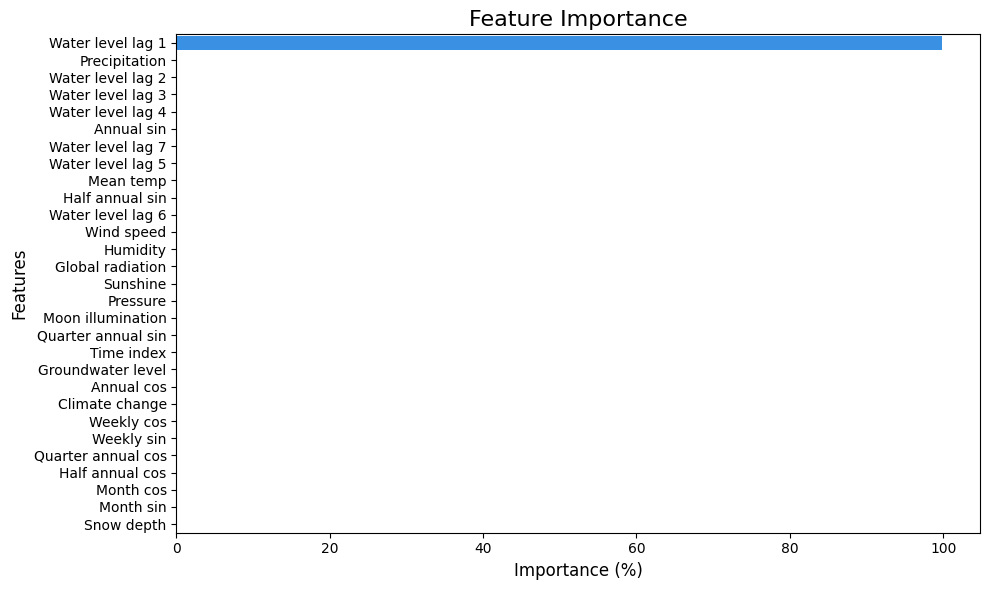

In [9]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance (%)",
    y="Feature",
    data=importance_df,
    color="dodgerblue"
)

plt.title("Feature Importance", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()

plt.show()

/tmp/ipykernel_35690/1931327834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


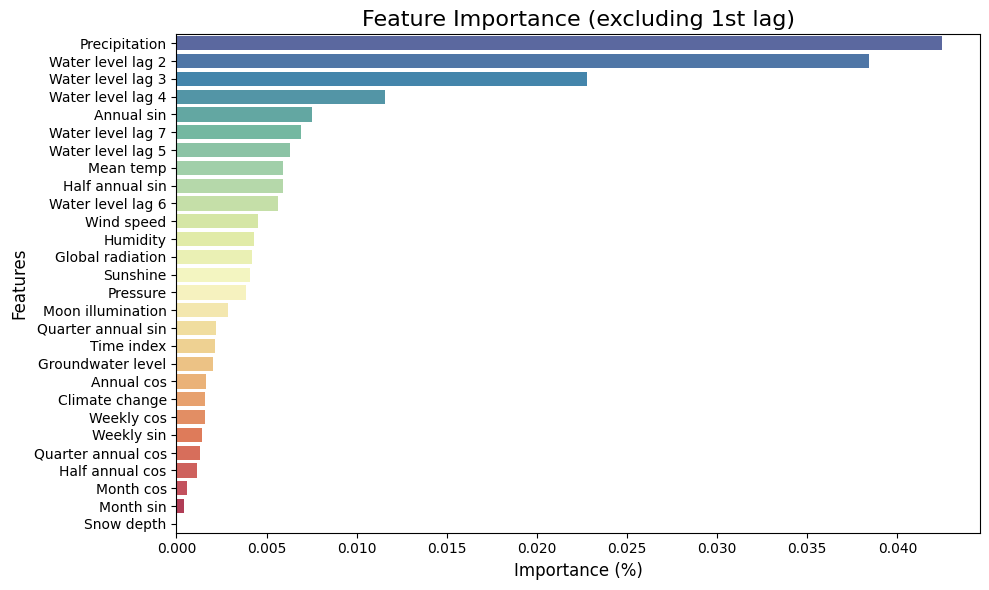

In [10]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance (%)",
    y="Feature",
    data=importance_df[1:],
    palette="Spectral_r"
)

plt.title("Feature Importance (excluding 1st lag)", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()

plt.show()

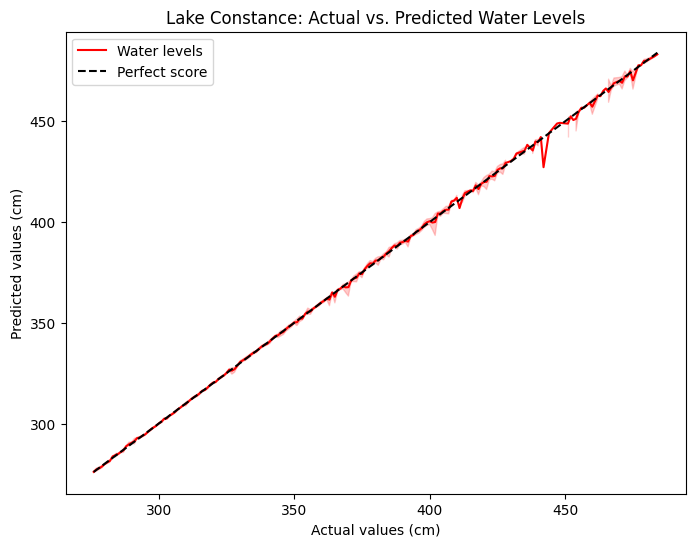

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=np.exp(y_test), y=np.exp(y_pred_forest), label='Water levels', color='red')

# Add the perfect score line
min_val = np.exp(y_test).min()
max_val = np.exp(y_test).max()
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Perfect score')

# Customize the plot
plt.xlabel("Actual values (cm)")
plt.ylabel("Predicted values (cm)")
plt.title("Lake Constance: Actual vs. Predicted Water Levels")
plt.legend()

# Show the plot
plt.show()

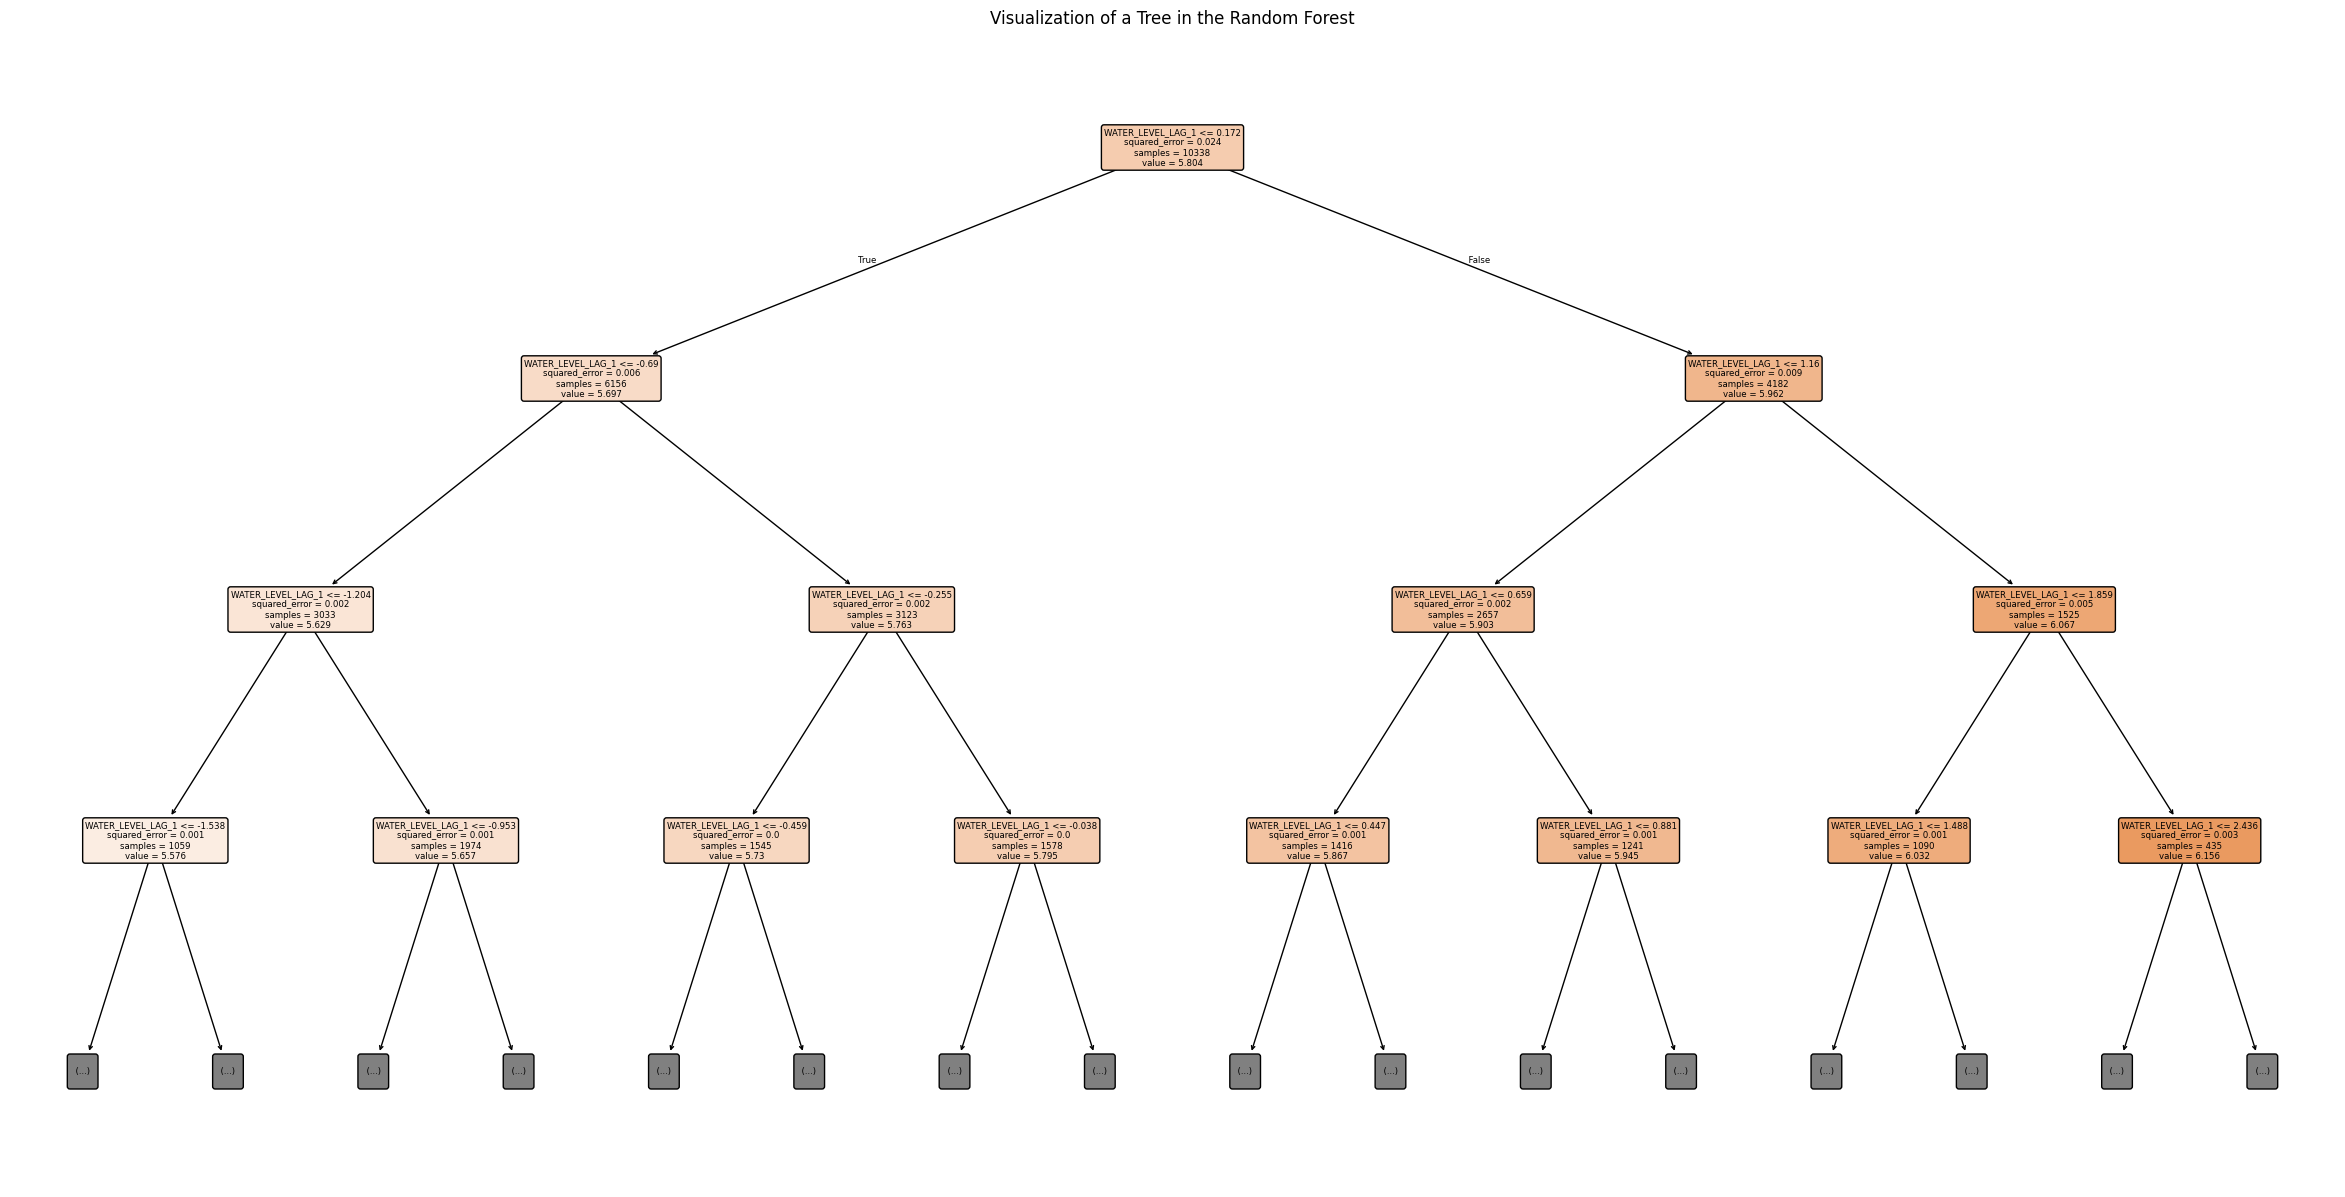

In [12]:
from sklearn.tree import plot_tree

tree = forest.estimators_[0]

plt.figure(figsize=(30, 15))
plot_tree(
    tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Visualization of a Tree in the Random Forest")
plt.show()